## Question  1 : Showing data
#### Load the training and test data files and answer the following questions:

In [21]:
import numpy as np

##### i. How many training and test examples are there? You can use np.loadtxt for this purpose. Show at least 10 randomly selected objects of each class using plt.matshow.

In [22]:
Xtrain = np.loadtxt('https://raw.githubusercontent.com/foxtrotmike/CS909/master/2022/A1/Xtrain.csv')
Ytrain = np.loadtxt('https://raw.githubusercontent.com/foxtrotmike/CS909/master/2022/A1/Ytrain.csv')
Xtest = np.loadtxt('https://raw.githubusercontent.com/foxtrotmike/CS909/master/2022/A1/Xtest.csv')

In [23]:
print('Number of training examples:', len(Xtrain))
print('Number of test examples:', len(Xtest))

Number of training examples: 3000
Number of test examples: 3000


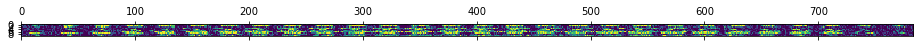

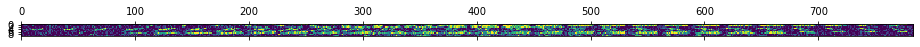

In [24]:
import matplotlib.pyplot as plt
Xpos = Xtrain[Ytrain==1]
Xneg = Xtrain[Ytrain==-1]

Xpos_selected_ind = np.random.randint(0,high = len(Xpos),size = 10)
Xneg_selected_ind = np.random.randint(0,high = len(Xneg),size = 10)
plt.matshow(Xtrain[Xpos_selected_ind])
plt.matshow(Xtrain[Xneg_selected_ind])

##### ii. How many positive and negative examples are there in the training dataset?

In [25]:
numpos = np.sum(Ytrain == 1)
numneg = np.sum(Ytrain == -1)
print('Number of positive examples: ',numpos)
print('Number of negative examples: ',numneg)

Number of positive examples:  2118
Number of negative examples:  882


##### iii. Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your reasoning.

Around 70% of the data are correspond to the positive example, whereas less than 30% correspond to the negative example. This imbalance is considerably high. However, in this assignment there is not specification for a clear preference between the classes. It is not specified if a high precision is needed or preferred, or if one of the errors has more significance than the other. The decision of which performance metric to use is highly related to the context of the necessity this algorithm is going to address. Therefore, as it is not specified, we will use the AUC-ROC metric.

##### iv. What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate why this would be the case.

If a classifier generates random labels for a given set of examples, then it outpus $1$ with probability $p$, and $-1$ with probability $1-p$. Denoting the number of positive examples as $n^+$ and the number of negative examples as $n^-$ then we have the following:

$$ tp = p \cdot n^+$$ $$ tn = (1-p) \cdot n^- $$
$$ fp = p \cdot n^-$$ $$ fn = (1-p) \cdot n^+ $$

Thus,
$$ Accuracy = \frac{tp + tn}{tp + tp + fp + fn} = \frac{p \cdot n^+ + (1-p) \cdot n^-}{p \cdot n^+ + (1-p) \cdot n^- + p \cdot n^- + (1-p) \cdot n^+} = \frac{p \cdot n^+ + (1-p) \cdot n^-}{n^+ + n^-} $$

In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(Xtrain,Ytrain)
Y_predicted = dummy_clf.predict(Xtrain)
dummy_clf.score(None,Ytrain)


0.706

As the Dummy classifier has by default the 'prior' strategy, it is going to predict always the most frequent class label in 'Ytrain'. Thus, in this case $p = 1$ and the score corresponds to the quotient between the number of positive examples divided by the total number of examples. However, we could change this using a 'uniform' strategy.

In [27]:
dummy_clf = DummyClassifier(strategy = 'uniform')
dummy_clf.fit(Xtrain,Ytrain)
Y_predicted = dummy_clf.predict(Xtrain)
dummy_clf.score(None,Ytrain)

0.48933333333333334

If the strategy is uniform, we have that $p = \frac{1}{2}$ so each class has equal probability and therefore the expected score is going to be 0.5 (we can actually see if we rerun the previous code that the score is always 'close' to 0.5).

We assume that the distribution of the test data is very similar to the distribution of the training data and therefore the results would be analogue.

Clearly a random classifier is never going to be the best classifier. However, it sets a lower bound in the accuracies of our classifiers. Anything worse than random is completely wrong and pointless. (Sometimes if the classifier is worse than random the solution is just to switch the labels)

##### v. What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate why this would be the case.

In this exercise we are going to explain how the Receiver Operating Characteristics and the Precision-Recall curves are going to look like and the results of the area under each curve. For that we are going to use the plot functions given in the labs.

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
def plotROC(y,z,pstr = ''):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(tt,fpr,'o-',tt,tpr,'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    plt.figure()
    plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

We are going to randomly separate our data set into two parts, one that will be used as a training set, and another that will be used as a validation set.

In [29]:
from sklearn.model_selection import train_test_split
Xtr, Xv, ytr, yv = train_test_split(Xtrain,Ytrain,test_size = 0.3)

Training AUC ROC: 0.47844806428001857
Training AUC PR: 0.6956674843527882


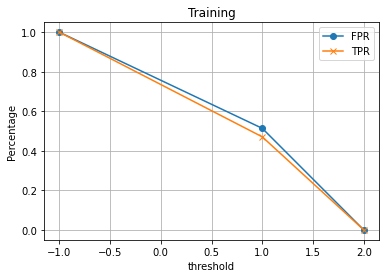

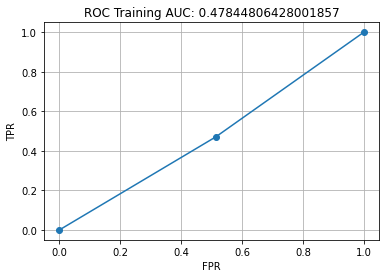

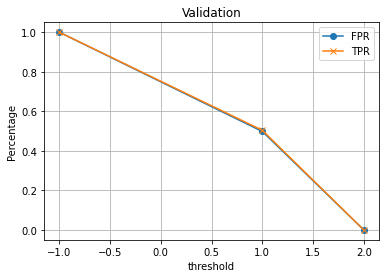

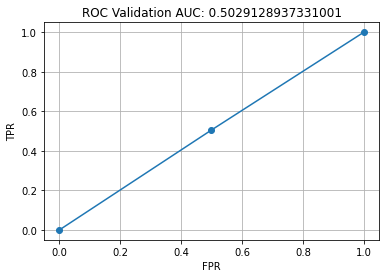

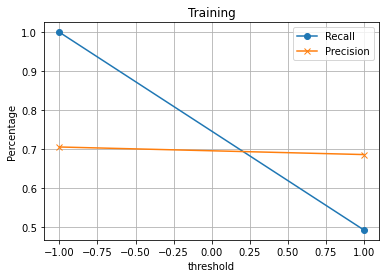

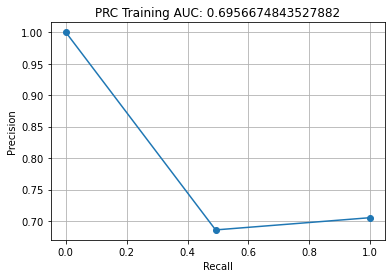

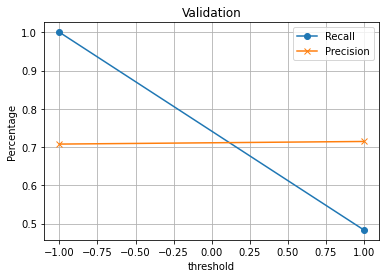

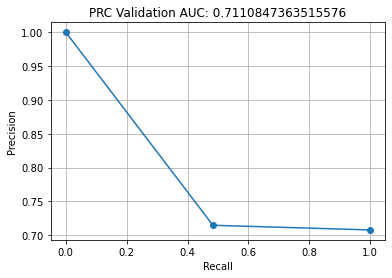

<Figure size 432x288 with 0 Axes>

In [30]:
clf = DummyClassifier(strategy = 'uniform').fit(Xtrain,Ytrain)
roc_tr = plotROC(ytr, clf.predict(Xtr),'Training')
roc_v = plotROC(yv,clf.predict(Xv),'Validation')
pr_tr = plotPRC(ytr,clf.predict(Xtr),'Training')
pr_v = plotPRC(yv,clf.predict(Xv),'Validation')

plt.figure()

print('Training AUC ROC:', roc_tr)
print('Training AUC PR:', pr_tr)

As the random classifier has no preference between either of the classes and follows a uniform strategy (labeling each point to either of the classes with the same probability), then the AUC-ROC is going to be around $\frac{1}{2}$, as the TPR and the FPR are going to have the same values. In the case of the AUC-ROC, this is going to correspond approximately to the proportion of positive examples in each of the sets.

Regarding the test dataset, the results are analogue as we suppose that they have the same distribution.

## Question 2 - Nearest Neighbor Classifier

##### Perform 5-fold stratified cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) over the training dataset using the k = 1 nearest neighbour classifier and answer the following questions:
##### i. What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results.

Fold  0 
 Accuracy 0.7583333333333333 
 AUC ROC: 0.7342945969125215 
 AUC PR: 0.8241835901867588
Fold  1 
 Accuracy 0.7566666666666667 
 AUC ROC: 0.7314536878216124 
 AUC PR: 0.822464004086454
Fold  2 
 Accuracy 0.7583333333333333 
 AUC ROC: 0.7226629502572899 
 AUC PR: 0.8167544388299106
Fold  3 
 Accuracy 0.7533333333333333 
 AUC ROC: 0.7248467363865849 
 AUC PR: 0.8172761134037194
Fold  4 
 Accuracy 0.7383333333333333 
 AUC ROC: 0.7076371358737027 
 AUC PR: 0.8073976168302409


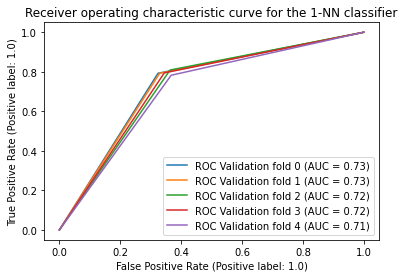

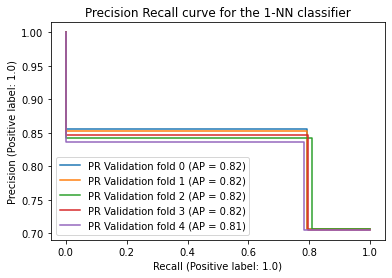

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

accs = []; roc_aucs = []; pr_aucs = []
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
skf = StratifiedKFold(n_splits=5,shuffle = True, random_state = 42)

for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain, Ytrain)):
    Xtr, Xv = Xtrain[tr_idx], Xtrain[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors = 1)
    clf.fit(Xtr,ytr)
    
    z = clf.predict_proba(Xv)
    
    acc = clf.score(Xv,yv)
    fpr, tpr, thresholds = roc_curve(yv, z[:,1])
    precision, recall, _ = precision_recall_curve(yv, z[:,1])
    
    roc_auc = auc(fpr,tpr)
    pr_auc = average_precision_score(yv,z[:,1])
    #pr_auc = auc(recall,precision)
    
    auc_plot = RocCurveDisplay.from_estimator(clf, Xv, yv, name = "ROC Validation fold "+str(i),ax = ax)
    pr_plot = PrecisionRecallDisplay.from_estimator(clf, Xv, yv, name = "PR Validation fold "+str(i),ax=ax2)
    
    accs.append(acc)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)
    
    print('Fold ',i,'\n Accuracy', acc ,'\n AUC ROC:',roc_auc, '\n AUC PR:', pr_auc)
    

ax.set(title="Receiver operating characteristic curve for the 1-NN classifier")
ax2.set(title="Precision Recall curve for the 1-NN classifier")

plt.show()

##### ii. What is the mean and standard deviation of each performance metric (accuracy, AUC-ROC and AUC-PR) across all the folds for this classifier? Show code to demonstrate the results.

In [32]:
print('Mean Accuracy:', np.mean(accs))
print('Stdev Accuracy',np.std(accs),'\n')

print('Mean AUC ROC',np.mean(roc_aucs))
print('Stdev AUC ROC',np.std(roc_aucs),'\n')

print('Mean AUC PR',np.mean(pr_aucs))
print('Stdev AUC PR',np.std(pr_aucs),'\n')

Mean Accuracy: 0.753
Stdev Accuracy 0.007557189365836437 

Mean AUC ROC 0.7241790214503423
Stdev AUC ROC 0.009291113294685972 

Mean AUC PR 0.8176151526674167
Stdev AUC PR 0.0058636088895112305 



##### iii. What is the impact of various forms of pre-processing (https://scikit-learn.org/stable/modules/preprocessing.html ) on the cross-validation performance? Show code to demonstrate the results.

It is important when getting to conclusions with our data to be aware of its distribution first. Also, it can help to do some preprocessing so that the classifier algorithms can run faster.

Let's use first Standard Scaler() which will transform our data removing themean and scaling to unit variance.

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


Xt_st_scal = preprocessing.StandardScaler().fit_transform(Xtrain)

skf = StratifiedKFold(n_splits=5,shuffle = True, random_state = 42)
A = []; R = []; P = [] 
for i,(tr_idx, v_idx) in enumerate(skf.split(Xt_st_scal, Ytrain)):
  Xtr, Xv = Xt_st_scal[tr_idx], Xt_st_scal[v_idx]
  ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
  clf = KNeighborsClassifier(n_neighbors=1) 
  clf.fit(Xtr,ytr)
  z = clf.predict(Xv)

  acc = np.mean(z==yv)

  fpr,tpr,tt = roc_curve(yv, z)
  roc_auc = auc(fpr, tpr)
    
  pr_auc = average_precision_score(yv,z)
  P.append(pr_auc)

  
    
  A.append(acc) 
  R.append(roc_auc)
  P.append(pr_auc)

print('Mean Accuracy:', np.mean(A))
print('Stdev Accuracy',np.std(A),'\n')

print('Mean AUC ROC',np.mean(R))
print('Stdev AUC ROC',np.std(R),'\n')

print('Mean AUC PR',np.mean(P))
print('Stdev AUC PR',np.std(P),'\n')

Mean Accuracy: 0.7493333333333334
Stdev Accuracy 0.016006942938057288 

Mean AUC ROC 0.717270776060725
Stdev AUC ROC 0.019557067235782936 

Mean AUC PR 0.8136101485476497
Stdev AUC PR 0.011305748846371262 



We can also normalize these data, which make it easier for the algorithms to run.

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

Xt_st_scal = preprocessing.StandardScaler().fit_transform(Xtrain)
Xt_normalized = preprocessing.Normalizer().fit_transform(Xt_st_scal)

skf = StratifiedKFold(n_splits=5,shuffle = True, random_state = 42)
A = []; R = []; P = [] 
for i,(tr_idx, v_idx) in enumerate(skf.split(Xt_normalized, Ytrain)):
  Xtr, Xv = Xt_normalized[tr_idx], Xt_normalized[v_idx]
  ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
  clf = KNeighborsClassifier(n_neighbors=1)
  clf.fit(Xtr,ytr)
  z = clf.predict(Xv)

  acc = np.mean(z==yv)

  fpr,tpr,tt = roc_curve(yv, z)
  roc_auc = auc(fpr, tpr)
    
  pr_auc = average_precision_score(yv,z)
  P.append(pr_auc)
    
  A.append(acc) 
  R.append(roc_auc)
  P.append(pr_auc)
  
print('Mean Accuracy:', np.mean(A))
print('Stdev Accuracy',np.std(A),'\n')

print('Mean AUC ROC',np.mean(R))
print('Stdev AUC ROC',np.std(R),'\n')

print('Mean AUC PR',np.mean(P))
print('Stdev AUC PR',np.std(P),'\n')

Mean Accuracy: 0.7616666666666667
Stdev Accuracy 0.009718253158075478 

Mean AUC ROC 0.7124096301556344
Stdev AUC ROC 0.01265973181934641 

Mean AUC PR 0.8098391191960539
Stdev AUC PR 0.0069895107418192146 



We could also use RobustScaler() if we suspect that we may have outliers. This is probably not the case as the data values are in always in the range from 0 to 255.

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


Xt_rob = preprocessing.RobustScaler().fit_transform(Xtrain)



skf = StratifiedKFold(n_splits=5,shuffle = True, random_state = 42)
A = []; R = []; P = [] 
for i,(tr_idx, v_idx) in enumerate(skf.split(Xt_rob, Ytrain)):
  Xtr, Xv = Xt_rob[tr_idx], Xt_rob[v_idx]
  ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
  clf = KNeighborsClassifier(n_neighbors=1)
  clf.fit(Xtr,ytr)
  z = clf.predict(Xv)

  acc = np.mean(z==yv)

  fpr,tpr,tt = roc_curve(yv, z)
  roc_auc = auc(fpr, tpr)
    
  pr_auc = average_precision_score(yv,z)
  P.append(pr_auc)

  A.append(acc) 
  R.append(roc_auc)
  P.append(pr_auc)
  
print('Mean Accuracy:', np.mean(A))
print('Stdev Accuracy',np.std(A),'\n')

print('Mean AUC ROC',np.mean(R))
print('Stdev AUC ROC',np.std(R),'\n')

print('Mean AUC PR',np.mean(P))
print('Stdev AUC PR',np.std(P),'\n')

Mean Accuracy: 0.7223333333333334
Stdev Accuracy 0.01289271973720915 

Mean AUC ROC 0.6855433919239893
Stdev AUC ROC 0.02095682225826065 

Mean AUC PR 0.795871764255548
Stdev AUC PR 0.011130315694492295 



As we know that the data is coming from images, we know the maximum (255) and the minimum (0) of the values. Thus, it could also be interesting to use MinMaxScaler instead of StandardScaler

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

Xt_minmax = preprocessing.MinMaxScaler().fit_transform(Xtrain)

skf = StratifiedKFold(n_splits=5,shuffle = True, random_state = 42)
A = []; R = []; P = [] 
for i,(tr_idx, v_idx) in enumerate(skf.split(Xt_minmax, Ytrain)):
  Xtr, Xv = Xt_minmax[tr_idx], Xt_minmax[v_idx]
  ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
  clf = KNeighborsClassifier(n_neighbors=1)
  clf.fit(Xtr,ytr)
  z = clf.predict(Xv)

  acc = np.mean(z==yv)

  fpr,tpr,tt = roc_curve(yv, z)
  roc_auc = auc(fpr, tpr)
    
  pr_auc = average_precision_score(yv,z)
  P.append(pr_auc)

  A.append(acc) 
  R.append(roc_auc)
  P.append(pr_auc)
  
print('Mean Accuracy:', np.mean(A))
print('Stdev Accuracy',np.std(A),'\n')

print('Mean AUC ROC',np.mean(R))
print('Stdev AUC ROC',np.std(R),'\n')

print('Mean AUC PR',np.mean(P))
print('Stdev AUC PR',np.std(P),'\n')

Mean Accuracy: 0.7536666666666667
Stdev Accuracy 0.007986099033807315 

Mean AUC ROC 0.7233257137095702
Stdev AUC ROC 0.009454252983725372 

Mean AUC PR 0.8170294445531223
Stdev AUC PR 0.005892232587027002 



We can see that the metric sores have not changed too much using preprocessed data in comparison to using the original data. This has two positive meanings. First, that our data does not have a 'weird' distribution and second, that we can use preprocessed data equivalently to original data, which will make our algorithms to run faster. The best performance results after preprocessing are given by the use of the function MinMaxScaler. However, my computer seems to have trouble doing the GridSearchCV after preprocessing the data using this function, so I am going to use StandardScaler and Normalizer, which facilitate the convergence of the classifiers.

##### iv. Use 5-fold cross-validation over training data to calculate the optimal value of k for the k-Nearest neighbour classifier. What is the optimal value of k and what are the cross-validation accuracy, AUC-ROC and AUC-PR? Show code to demonstrate the results.

In [37]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import preprocessing

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
Xt_sc = preprocessing.StandardScaler().fit_transform(Xtrain)
Xt_norm = preprocessing.Normalizer().fit_transform(Xt_sc)

knn_params = {
    'n_neighbors': range(1,50)
}
scores = []
score_metrics = ['accuracy', 'roc_auc', 'average_precision']
for element in score_metrics:
    clf =  GridSearchCV(KNeighborsClassifier(), knn_params, scoring = element, cv=5, return_train_score=False,n_jobs = -1)
    clf.fit(Xt_norm, Ytrain)
    scores.append({
        'metric': element,
        'best_score': clf.best_score_, 
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['metric','best_score','best_params'])
df

metric  best_score          best_params
0           accuracy    0.772333   {'n_neighbors': 7}
1            roc_auc    0.789473   {'n_neighbors': 7}
2  average_precision    0.880916  {'n_neighbors': 16}

We observe that in terms of the AUC-ROC metric, which is the one we have chosen to analyse the dataset, the optimal value of k is 10.

## Question 3 - Cross-validation
##### Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: k-nearest neighbour, Perceptron, Naïve Bayes Classifier, Logistic regression, Linear SVM and Kernelized SVM. Be sure to tune the hyperparameters of each classifier type (k for k-nearest neighbour, C and kernel type and parameters for SVM and so on). Report the cross validation results (mean and standard deviation of accuracy, AUC-ROC and AUC-PR across fold) of your best model. You may look into grid search as well as ways of pre-processing data. Show code to demonstrate the results. Also show the comparison of these classifiers using a single table.

In [17]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import GridSearchCV

model_params = {
    'linear_svm': {
        'model': svm.SVC(),
        'params' : {
            'kernel':['linear'], 'C': [0.1,1,10,50,100,500,1000]
        } 
    },
    'kernelized_svm': {
        'model': svm.SVC(),
        'params':{
            'kernel':['rbf'], 'gamma': [0.1,1e-2,1e-3, 1e-4], 'C': [0.1,1, 10, 100, 1000]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': np.logspace(0,-9, num=100)
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [0.1,1,5,10]
        }
    },
    'perceptron' : {
        'model': Perceptron(),
        'params': {
            'alpha': [0.1, 1e-2, 1e-3, 1e-4]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,30]
        }
    }
}

Note: It is very important to preprocess our data in order to achieve a faster convergence of the algorithms, specially for the
case of the SVM. However, here we are preprocessing the entire data set which we will then divide into a train and a test 
data set. This results in certain leakage of information from the test set into the train set when doing k-folding. As we
suppose that the data is randomly picked, this should not be significant. However, in exercise 5, we will develop a pipeline 
which will avoid this leakage.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



Xt_sc = preprocessing.StandardScaler().fit_transform(Xtrain)
Xt_norm = preprocessing.Normalizer().fit_transform(Xt_sc)

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

scores = []
df_clf =[]
for model_name, mp in model_params.items():
    #We do the Grid Search using the roc_auc score as we have established it is the most adequate metric
    clf =  GridSearchCV(mp['model'], mp['params'], scoring = 'roc_auc', cv=skf, return_train_score=False,n_jobs = -1,verbose =1)
    clf.fit(Xt_norm[:,:], Ytrain[:])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_, 
        'best_params': clf.best_params_
    })
    df_clf.append(pd.DataFrame(clf.cv_results_))
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


model  best_score                                 best_params
0           linear_svm    0.582110                {'C': 1, 'kernel': 'linear'}
1       kernelized_svm    0.677965  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
2          naive_bayes    0.546592    {'var_smoothing': 0.0012328467394420659}
3  logistic_regression    0.592637                                    {'C': 1}
4           perceptron    0.567957                              {'alpha': 0.1}
5                  knn    0.792094                         {'n_neighbors': 10}

In this case, we observe that the best model is kNN for k = 10. Therefore, using the same code we used in exercise 2 but fixing k = 10, we get the following

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
Xt_sc = preprocessing.StandardScaler().fit_transform(Xtrain)
Xt_norm = preprocessing.Normalizer().fit_transform(Xt_sc)

scores = []
score_metrics = ['accuracy', 'roc_auc', 'average_precision']
for element in score_metrics:
    clf =  GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[10]} , scoring = element, cv=5, return_train_score=False,n_jobs = -1)
    clf.fit(Xt_norm, Ytrain)
    scores.append({
        'metric': element,
        'best_score for k = 10': clf.best_score_, 
    })

df = pd.DataFrame(scores,columns=['metric','best_score for k = 10'])
df

metric  best_score for k = 10
0           accuracy               0.760000
1            roc_auc               0.786084
2  average_precision               0.877340

## Question 4 - PCA

##### i. Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of the training data. What are your observations based on the data?

In [39]:
from sklearn.decomposition import PCA
from matplotlib.pyplot import scatter,axis
pca2 = PCA(n_components=2)
pca2.fit(Xtrain)
PC = pca2.transform(Xtrain)
print(Xtrain.shape)
print(PC.shape)

(3000, 784)
(3000, 2)


In [40]:
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('b','r'), markers = ('.','.'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)        
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:            
            conts = sorted([-1+eps,0,1-eps])
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return


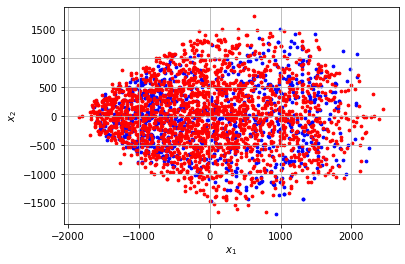

In [41]:
plotit(PC[:,0:2], Ytrain)

In [42]:
print('The proportion of variance explain by the first two principal components is:', np.sum(pca2.explained_variance_ratio_))

The proportion of variance explain by the first two principal components is: 0.2687563217029364


It is obvious that this proportion of variance is not enough to get significant results from just these two components. From the plot we can observe that there is not a clear distibution between the classes

##### ii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.

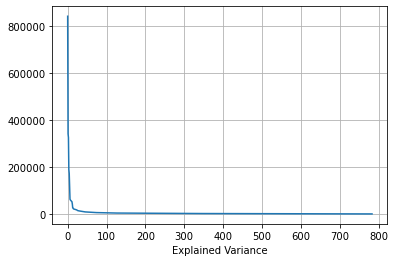

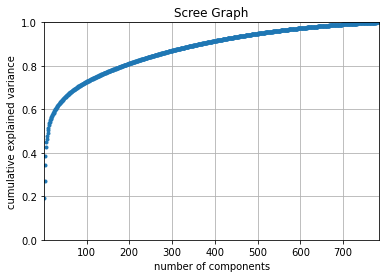

In [43]:
pca = PCA(n_components = 784)
pca.fit(Xtrain)
plt.plot(pca.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.figure()
plt.plot(np.arange(len(pca.explained_variance_ratio_))+1,np.cumsum(pca.explained_variance_ratio_),'.') #plot the scree graph
plt.axis([1,len(pca.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()

In [44]:
for i in range(len(np.cumsum(pca.explained_variance_ratio_))):
    if np.cumsum(pca.explained_variance_ratio_)[i] > 0.95:
        print('The number of dimensions that explain 95% of the variance is', i+1)
        break

The number of dimensions that explain 95% of the variance is 506


##### iii. Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization.

In [45]:
pca = PCA(n_components=506)
pca.fit(Xtrain)
projected_tr_data = pca.transform(Xtrain)

In [46]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

model_params_SVM = {
    'kernelized_svm': {
        'model': svm.SVC(),
        'params':{
            'kernel':['rbf'], 'gamma': [0.1,1e-2,1e-3, 1e-4], 'C': [1e-4,1e-3,1e-2,0.1,1,5, 10,50, 100, 1000]
        }
    }
}

Xt_sc = preprocessing.StandardScaler().fit_transform(Xtrain)
Xt_norm = preprocessing.Normalizer().fit_transform(Xt_sc)

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

df_SVM=[]
score_SVM=[]
for model_name, mp in model_params_SVM.items():
    clf =  GridSearchCV(mp['model'], mp['params'], scoring = 'roc_auc', cv=skf, return_train_score=False, n_jobs = -1)
    clf.fit(Xt_norm, Ytrain)
    score_SVM.append({
        'model': model_name,
        'best_score': clf.best_score_, 
        'best_params': clf.best_params_
    })

df_SVM = pd.DataFrame(clf.cv_results_)
df_SVM

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        7.752584      0.149554         1.759143        0.061537  0.0001   
1        7.466437      0.086391         1.727820        0.184498  0.0001   
2        7.463916      0.035957         1.696042        0.137105  0.0001   
3        7.395248      0.041644         1.676370        0.083084  0.0001   
4        7.443307      0.082815         1.692586        0.091976   0.001   
5        7.351363      0.022770         1.726672        0.024542   0.001   
6        7.390127      0.044292         1.690967        0.009846   0.001   
7        7.378424      0.039988         1.838425        0.064994   0.001   
8        8.644574      0.073740         2.106995        0.144591    0.01   
9        7.168084      0.216966         1.970993        0.197950    0.01   
10       7.150106      0.157700         1.865483        0.142697    0.01   
11       7.116539      0.092287         1.784721        0.029782    0.01   
12       9.486172      0.159713         2.088288        0.093449     0.1   
13       9.000180      0.106806         2.059511        0.150844     0.1   
14       7.470140      0.203796         1.856814        0.038934     0.1   
15       7.138125      0.108819         2.040863        0.155359     0.1   
16       9.079566      0.427374         2.493969        0.227910       1   
17       9.196458      0.244644         2.428411        0.095345       1   
18       8.428370      0.124894         2.354240        0.089965       1   
19       6.796136      0.091634         2.166830        0.088859       1   
20       8.424789      0.137730         2.664613        0.057175       5   
21       8.723309      0.163588         2.775639        0.277083       5   
22       9.802811      0.562902         2.568649        0.164107       5   
23       8.056308      0.597654         2.207848        0.147582       5   
24       8.923489      0.292967         2.807953        0.321895      10   
25       9.693324      0.701331         2.510182        0.191079      10   
26       9.567511      0.310054         2.510818        0.192895      10   
27       8.826291      0.504477         2.320832        0.203841      10   
28       8.995297      0.335736         2.557572        0.055758      50   
29       8.476856      0.062535         2.421493        0.194411      50   
30       8.835321      0.286670         2.595521        0.289580      50   
31       9.256979      0.756295         2.534567        0.256680      50   
32      11.131205      0.845261         2.441581        0.128576     100   
33       8.432726      0.063947         2.431100        0.084616     100   
34       8.710951      0.166251         2.472996        0.131090     100   
35       9.028948      0.133495         2.466893        0.104243     100   
36      10.949796      0.351635         2.497159        0.125369    1000   
37       8.908709      0.150460         2.223078        0.177781    1000   
38       8.334887      0.165240         2.571312        0.148948    1000   
39       7.051155      1.226982         1.371246        0.667643    1000   

   param_gamma param_kernel                                           params  \
0          0.1          rbf     {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}   
1         0.01          rbf    {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}   
2        0.001          rbf   {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}   
3       0.0001          rbf  {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}   
4          0.1          rbf      {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}   
5         0.01          rbf     {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}   
6        0.001          rbf    {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
7       0.0001          rbf   {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}   
8          0.1          rbf       {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}   
9         0.01          rbf      {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}   
10     

In [47]:
df_ = pd.DataFrame(score_SVM,columns=['model','best_score','best_params'])
df_

model  best_score                                 best_params
0  kernelized_svm    0.677965  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

The score is not far off the one obtained using the original sized data. We got rid of more that 250 dimensions whose information was not too significant.

## Question 5

##### Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools at your disposal. However, no extra data sources may be used. Describe your pipeline and report your results over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order!). Your prediction file should be named by your student ID, e.g., u100011.csv

In [49]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('normalizer', Normalizer()),
    ('pca', PCA(n_components = 506)),
    ('clf', KNeighborsClassifier())
])

params = {'clf__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,30]}
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

grid = GridSearchCV(pipeline, param_grid = params, scoring = 'roc_auc', cv = skf, n_jobs = -1)
grid.fit(Xtrain, Ytrain)

print(grid.predict_proba(Xtest))
print(grid.best_params_)
pd_csv = pd.DataFrame(grid.predict_proba(Xtest)[:,0])


[[0.42857143 0.57142857]
 [0.57142857 0.42857143]
 [1.         0.        ]
 ...
 [0.         1.        ]
 [0.42857143 0.57142857]
 [0.         1.        ]]
{'clf__n_neighbors': 7}


After all the anaylsis done during the Assignment, I have decided to predict the labels of Xtest using a pipeline that preprocesses the data, does dimension reduction and used the k-Nearest Neighbors classifier, as it is the one that gives me a better performance in this dataset. Note that doing the preprocessing in a pipeline changes slightly the model, recognising now as the optimal parameter k=7 for the kNN. This is because of what we stated before. The preprocessing is being 

In [50]:
import csv
import pandas as pd

pd_csv.to_csv('u2189667.csv',columns = [0],header=False, index = False)